# 分布

In [1]:
import numpy as np
import polars as pl
from plotnine import *

## Stacked Histogram


In [2]:
mpg = pl.read_csv("data/mpg.csv")
mpg = mpg.rename({"class": "types"})
mpg.head()

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,types
str,str,f64,i64,i64,str,str,i64,i64,str,str
"""audi""","""a4""",1.8,1999,4,"""auto(l5)""","""f""",18,29,"""p""","""compact"""
"""audi""","""a4""",1.8,1999,4,"""manual(m5)""","""f""",21,29,"""p""","""compact"""
"""audi""","""a4""",2.0,2008,4,"""manual(m6)""","""f""",20,31,"""p""","""compact"""
"""audi""","""a4""",2.0,2008,4,"""auto(av)""","""f""",21,30,"""p""","""compact"""
"""audi""","""a4""",2.8,1999,6,"""auto(l5)""","""f""",16,26,"""p""","""compact"""


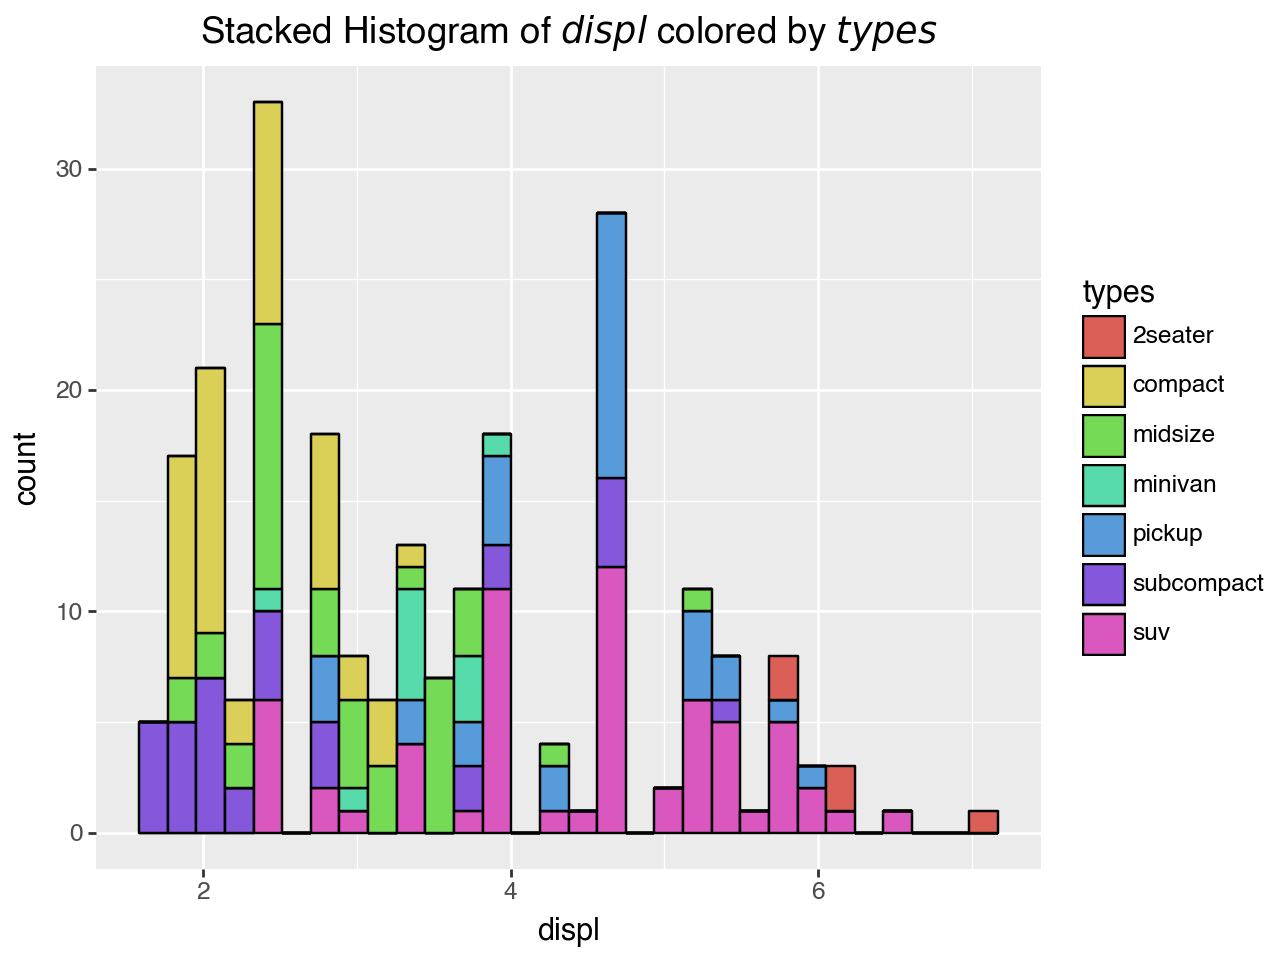

In [3]:
x_var, group_var = "displ", "types"

(
    ggplot(mpg, aes("displ", fill="types"))
    + geom_histogram(bins=30, color="black")
    + labs(title=f"Stacked Histogram of ${x_var}$ colored by ${group_var}$")
)

## Density


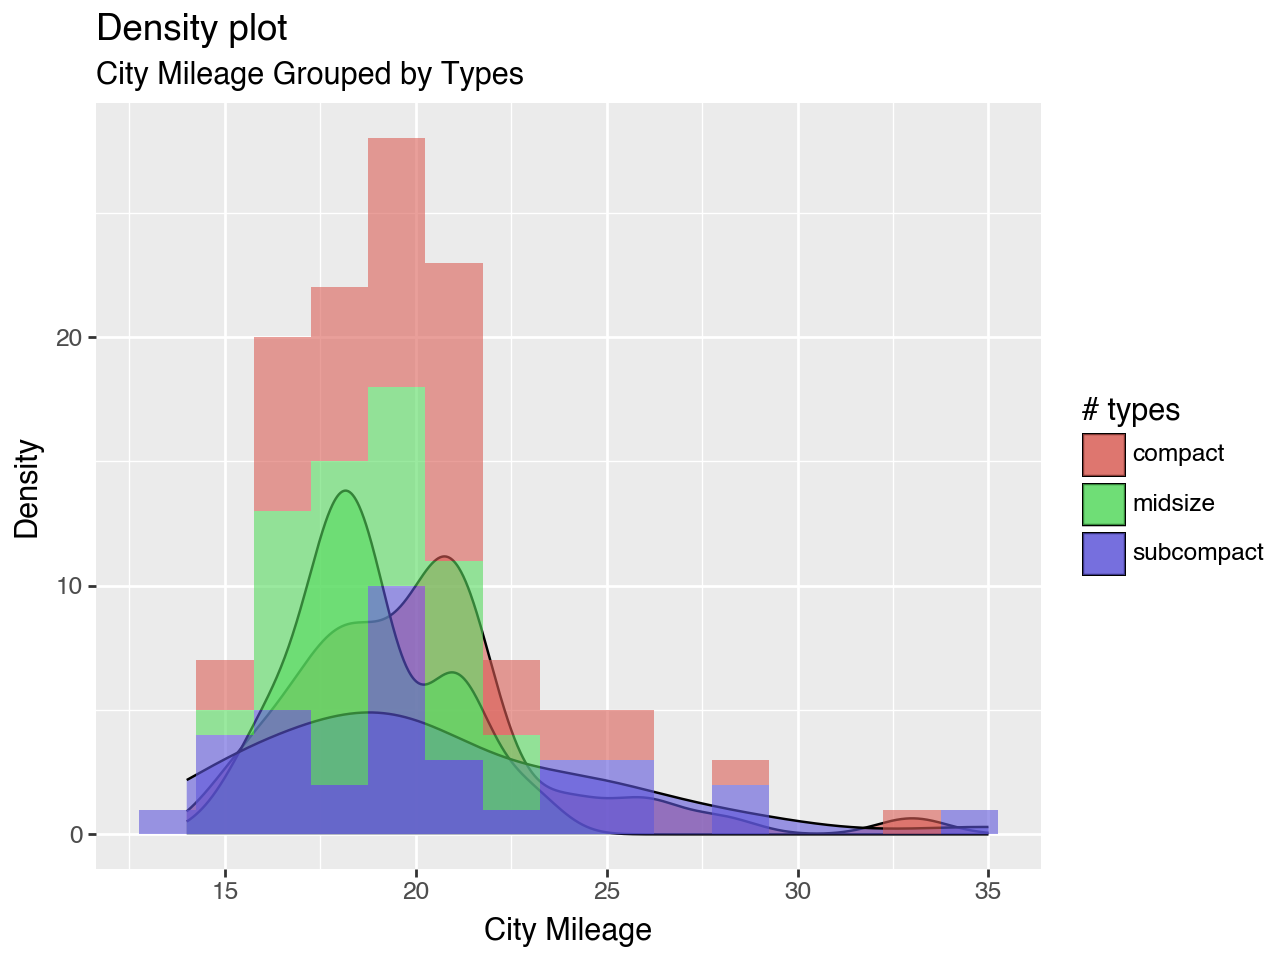

In [4]:
type_selected = ["compact", "subcompact", "midsize"]
mpg_selected = mpg.filter(
    (pl.col("types") == "compact")
    | (pl.col("types") == "subcompact")
    | (pl.col("types") == "midsize")
)
binwidth = 1.5

(
    ggplot(mpg_selected, aes("cty", fill="types"))
    + geom_density(aes(y=after_stat("count*binwidth")), alpha=0.6)
    + geom_histogram(
        aes(fill="types", y=after_stat("count")),
        binwidth=binwidth,
        color="none",
        alpha=0.6,
    )
    + labs(
        title="Density plot",
        subtitle="City Mileage Grouped by Types",
        x="City Mileage",
        y="Density",
        fill="# types",
    )
)

## Box


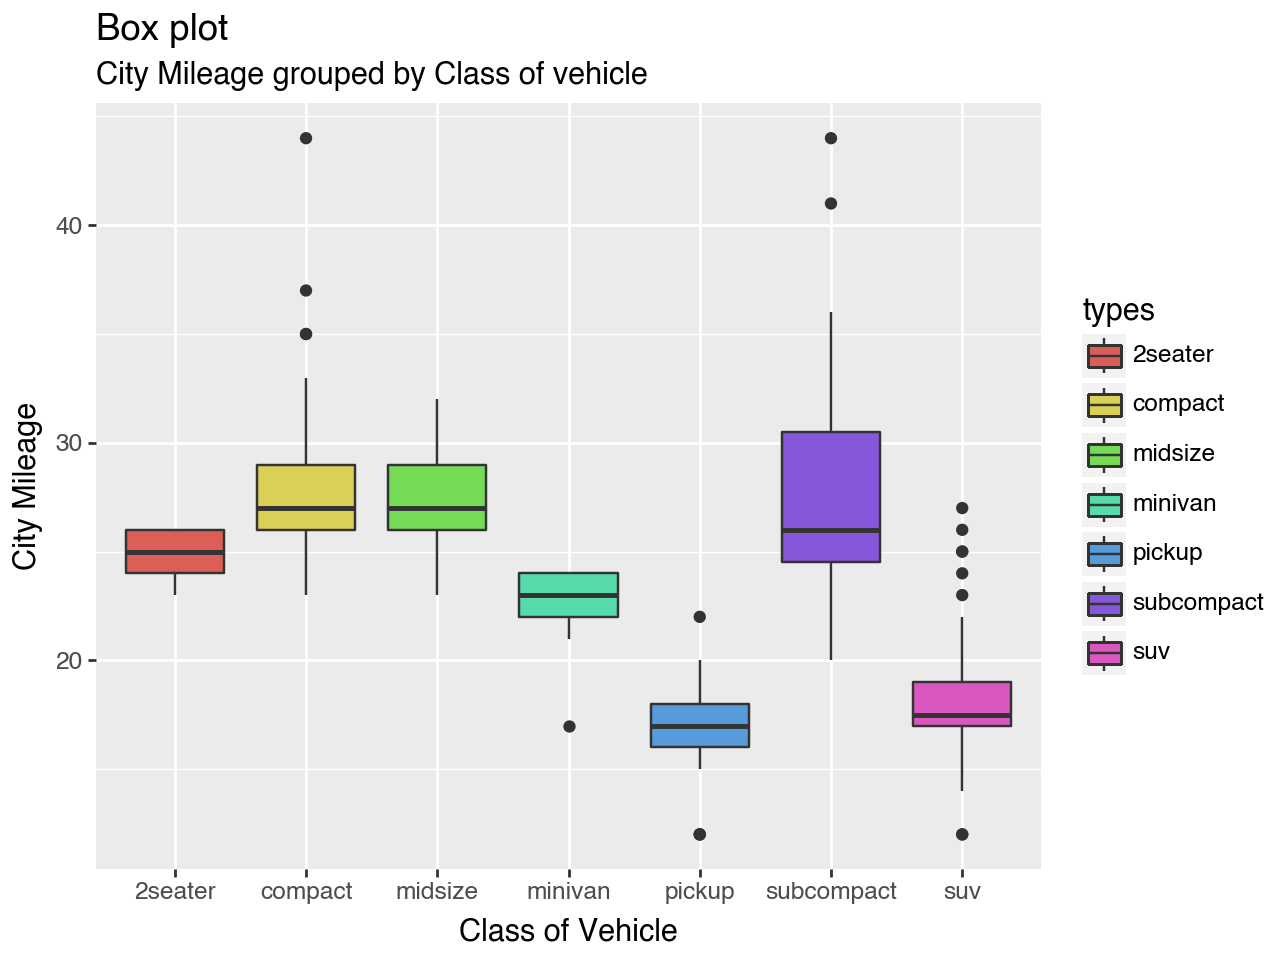

In [5]:
(
    ggplot(mpg, aes("types", "hwy"))
    + geom_boxplot(aes(fill="types"), notch=False)
    + labs(
        title="Box plot",
        subtitle="City Mileage grouped by Class of vehicle",
        x="Class of Vehicle",
        y="City Mileage",
    )
)

## Pyramid


In [6]:
email = pl.read_csv("data/email_campaign_funnel.csv")
email.head()

Stage,Gender,Users
str,str,f64
"""Stage 01: Browsers""","""Male""",-1.4928e7
"""Stage 02: Unbounced Users""","""Male""",-1.2863e7
"""Stage 03: Email Signups""","""Male""",-1.1362e7
"""Stage 04: Email Confirmed""","""Male""",-9.4117e6
"""Stage 05: Campaign-Email Opens""","""Male""",-8.0743e6


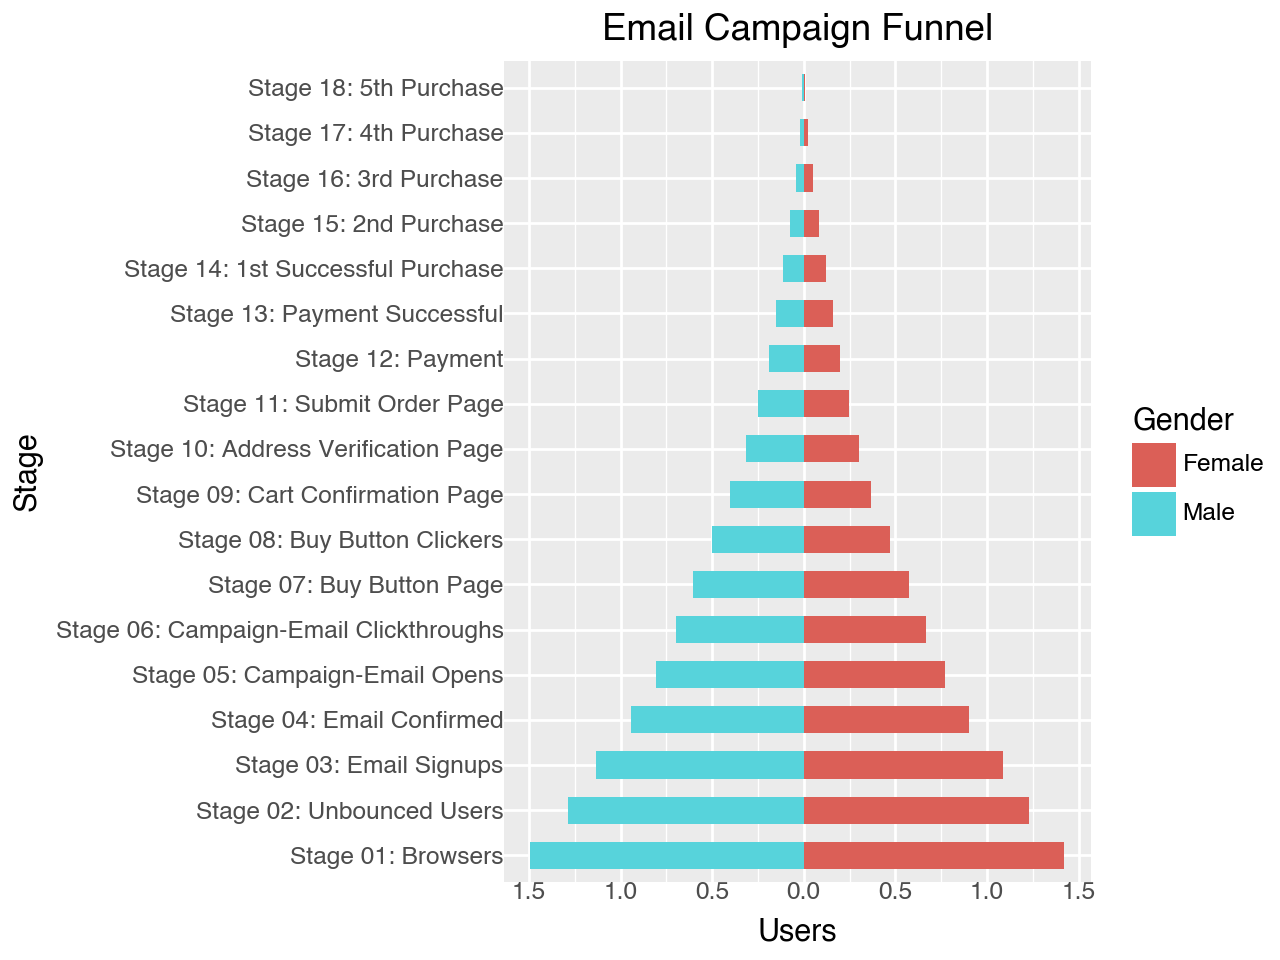

In [7]:
(
    ggplot(email, aes(x="Stage", y="Users", fill="Gender"))
    + geom_bar(stat="identity", width=0.6)  # Fill column
    + scale_y_continuous(
        breaks=np.arange(-1.5e7, 2e7, 5e6),
        labels=[*np.arange(1.5, 0, -0.5), *np.arange(0, 2, 0.5)],
    )
    + coord_flip()
    + labs(title="Email Campaign Funnel")
    + theme(plot_title=element_text(hjust=0.5), axis_ticks=element_blank())
)